In [1]:
! pip install yfinance


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ----------------- ---------------------- 1.3/3.0 MB 6.7 MB/s eta 0:00:01
     ---------------------------------------  2.9/3.0 MB 8.0 MB/s eta 0:00:01
     ---------------------------------------  2.9/3.0 MB 8.0 MB/s eta 0:00:01
     ---------------------------------------  2.9/3.0 MB 8.0 MB/s eta 0:00:01
     ---------------------------------------  2.9/3.0 MB 8.0 MB/s eta 0:00:01
     ---------------------------------------  2.9/3.0 MB 8.0 MB/s eta 0:00:01
     ---------------------------------------  2.9/3.0 MB 8.0 MB/s eta 0:00:01
     ---------------------------------------  2.9/3.0 MB 8.0 MB/s eta 0:00:01
     ---------------------------------------  2.9/3.0 MB 8.0 MB/s eta 0:00:01
     ---------------------------------------  2.9/3.0 MB 8.0 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 1.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencie

In [14]:
import yfinance as yf
import pandas as pd

# Definir el ticker del S&P 500
ticker = "^GSPC"  # Ticker del S&P 500

# Descargar los datos históricos
sp500 = yf.download(ticker, start="2009-01-01", end="2024-01-01")  # Ajusta las fechas según sea necesario

# Mostrar las primeras filas del DataFrame
print("DataFrame original:")
print(sp500.head())

# Convertir el índice 'Date' en una columna
sp5001 = sp500.reset_index()

# Mostrar las primeras filas del nuevo DataFrame
print("\nDataFrame después de convertir el índice 'Date' a columna:")
print(sp5001.head())


[*********************100%***********************]  1 of 1 completed

DataFrame original:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2009-01-02  902.989990  934.729980  899.349976  931.799988  931.799988   
2009-01-05  929.169983  936.630005  919.530029  927.450012  927.450012   
2009-01-06  931.169983  943.849976  927.280029  934.700012  934.700012   
2009-01-07  927.450012  927.450012  902.369995  906.650024  906.650024   
2009-01-08  905.729980  910.000000  896.809998  909.729980  909.729980   

                Volume  
Date                    
2009-01-02  4048270000  
2009-01-05  5413910000  
2009-01-06  5392620000  
2009-01-07  4704940000  
2009-01-08  4991550000  

DataFrame después de convertir el índice 'Date' a columna:
        Date        Open        High         Low       Close   Adj Close  \
0 2009-01-02  902.989990  934.729980  899.349976  931.799988  931.799988   
1 2009-01-05  929.169983  936.630005  919.530029  927.450012  927.450012  

In [15]:
sp5001['Date'] = pd.to_datetime (sp5001['Date']) # covertir columna a tipofecha 
sp5001

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,902.989990,934.729980,899.349976,931.799988,931.799988,4048270000
1,2009-01-05,929.169983,936.630005,919.530029,927.450012,927.450012,5413910000
2,2009-01-06,931.169983,943.849976,927.280029,934.700012,934.700012,5392620000
3,2009-01-07,927.450012,927.450012,902.369995,906.650024,906.650024,4704940000
4,2009-01-08,905.729980,910.000000,896.809998,909.729980,909.729980,4991550000
...,...,...,...,...,...,...,...
3769,2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000
3770,2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000
3771,2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000
3772,2023-12-28,4786.439941,4793.299805,4780.979980,4783.350098,4783.350098,2698860000


In [17]:
import numpy as np 

# Calcular el cambio porcentual diario
sp5001['Daily Change (%)'] = sp5001['Close'].pct_change() * 100

# Filtrar caídas (valores negativos)
sp5001['Daily Drop'] = np.where(sp5001['Daily Change (%)'] < 0, sp5001['Daily Change (%)'], 0)

# Calcular el promedio de caídas diarias
average_daily_drop = sp5001['Daily Drop'].mean()
print(f"Promedio de caídas diarias (%): {average_daily_drop:.2f}%")

# Agrupar datos semanalmente y calcular caídas
sp5001.set_index('Date', inplace=True)  # Usar la columna 'Date' como índice
weekly_drops = sp5001['Daily Drop'].resample('W').sum()  # Sumar caídas de la semana
average_weekly_drop = weekly_drops.mean()
print(f"Promedio de caídas semanales (%): {average_weekly_drop:.2f}%")

# Agrupar datos mensualmente y calcular caídas
monthly_drops = sp5001['Daily Drop'].resample('M').sum()  # Sumar caídas del mes
average_monthly_drop = monthly_drops.mean()
print(f"Promedio de caídas mensuales (%): {average_monthly_drop:.2f}%")

# Mostrar el DataFrame con cambios porcentuales y caídas
print("\nDataFrame con cambios porcentuales y caídas:")
print(sp5001[['Close', 'Daily Change (%)', 'Daily Drop']].tail(10))


Promedio de caídas diarias (%): -0.36%
Promedio de caídas semanales (%): -1.72%
Promedio de caídas mensuales (%): -7.48%

DataFrame con cambios porcentuales y caídas:
                  Close  Daily Change (%)  Daily Drop
Date                                                 
2023-12-15  4719.189941         -0.007625   -0.007625
2023-12-18  4740.560059          0.452834    0.000000
2023-12-19  4768.370117          0.586641    0.000000
2023-12-20  4698.350098         -1.468427   -1.468427
2023-12-21  4746.750000          1.030147    0.000000
2023-12-22  4754.629883          0.166006    0.000000
2023-12-26  4774.750000          0.423169    0.000000
2023-12-27  4781.580078          0.143046    0.000000
2023-12-28  4783.350098          0.037017    0.000000
2023-12-29  4769.830078         -0.282648   -0.282648


C:\Users\jassa\AppData\Local\Temp\ipykernel_12476\4033341016.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_drops = sp5001['Daily Drop'].resample('M').sum()  # Sumar caídas del mes


1. Análisis de Tendencias
Visualiza la tendencia de las caídas: 
Crea un gráfico de líneas que muestre cómo estos promedios se comportan a lo largo del tiempo. Esto te permitirá identificar patrones como aumentos o disminuciones en la frecuencia y magnitud de las caídas.
Comparar con periodos anteriores:
 Compara estas cifras con periodos anteriores (p. ej., trimestres o años) para entender si las caídas han aumentado o disminuido.
2. Análisis de Volatilidad
Calcula la desviación estándar de las caídas en cada periodo (diario, semanal y mensual) para evaluar la volatilidad y el riesgo asociado con estas caídas. Si la desviación estándar es alta, significa que hay más variabilidad en las caídas y el riesgo es mayor.
4. Predicción
Utiliza modelos de predicción como ARIMA o modelos de regresión para pronosticar las caídas futuras en base a las tendencias actuales. Si tienes datos históricos de caídas diarias, semanales y mensuales, puedes hacer predicciones para los siguientes periodos.

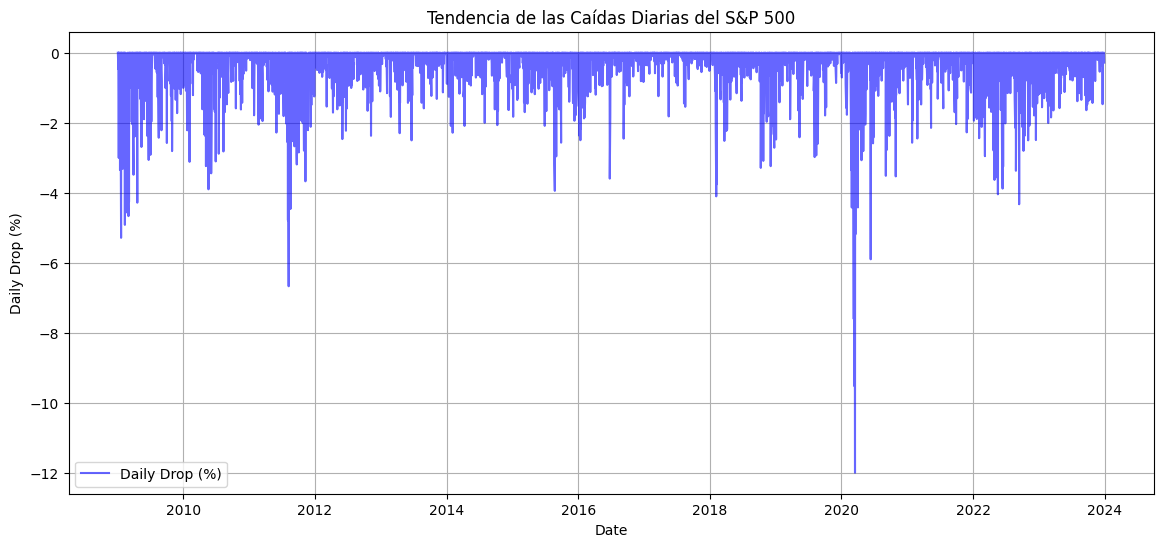

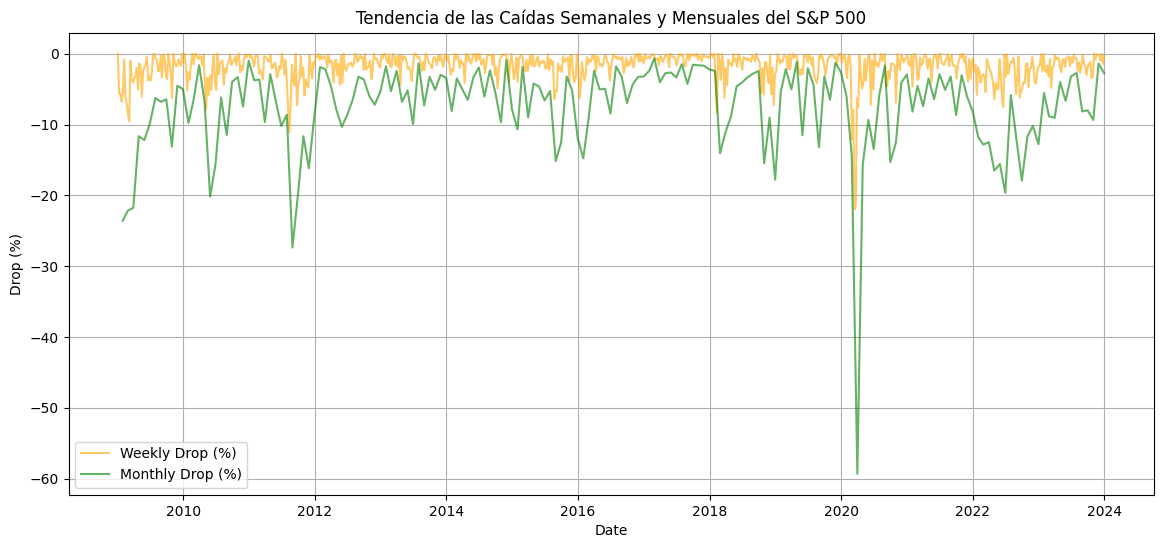

In [22]:
import matplotlib.pyplot as plt

# Gráfico de la tendencia de caídas diarias
plt.figure(figsize=(14, 6))
plt.plot(sp5001.index, sp5001['Daily Drop'], label='Daily Drop (%)', color='blue', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Daily Drop (%)')
plt.title('Tendencia de las Caídas Diarias del S&P 500')
plt.legend()
plt.grid()
plt.show()

# Gráfico de la tendencia de caídas semanales y mensuales
plt.figure(figsize=(14, 6))
plt.plot(weekly_drops.index, weekly_drops, label='Weekly Drop (%)', color='orange', alpha=0.6)
plt.plot(monthly_drops.index, monthly_drops, label='Monthly Drop (%)', color='green', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Drop (%)')
plt.title('Tendencia de las Caídas Semanales y Mensuales del S&P 500')
plt.legend()
plt.grid()
plt.show()


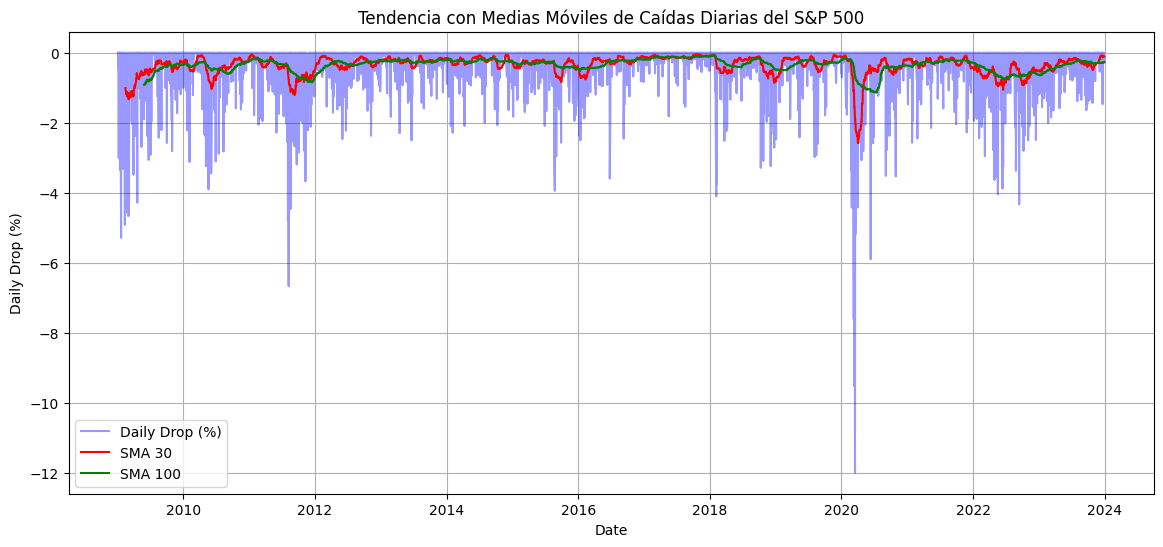

In [24]:
# Calcular medias móviles de las caídas diarias
sp5001['Daily Drop SMA 30'] = sp5001['Daily Drop'].rolling(window=30).mean()
sp5001['Daily Drop SMA 100'] = sp5001['Daily Drop'].rolling(window=100).mean()

# Gráfico de medias móviles
plt.figure(figsize=(14, 6))
plt.plot(sp5001.index, sp5001['Daily Drop'], label='Daily Drop (%)', color='blue', alpha=0.4)
plt.plot(sp5001.index, sp5001['Daily Drop SMA 30'], label='SMA 30', color='red')
plt.plot(sp5001.index, sp5001['Daily Drop SMA 100'], label='SMA 100', color='green')
plt.xlabel('Date')
plt.ylabel('Daily Drop (%)')
plt.title('Tendencia con Medias Móviles de Caídas Diarias del S&P 500')
plt.legend()
plt.grid()
plt.show()


In [25]:
daily_volatility = sp5001['Daily Drop'].std()
weekly_volatility = weekly_drops.std()
monthly_volatility = monthly_drops.std()
print(f"Volatilidad diaria: {daily_volatility:.2f}%")
print(f"Volatilidad semanal: {weekly_volatility:.2f}%")
print(f"Volatilidad mensual: {monthly_volatility:.2f}%")


Volatilidad diaria: 0.74%
Volatilidad semanal: 2.02%
Volatilidad mensual: 6.41%


In [27]:
from statsmodels.tsa.arima.model import ARIMA
#Modelo ARIMA: Utiliza ARIMA para modelar las caídas mensuales y predecir su comportamiento futuro.
# Crear un modelo ARIMA con las caídas mensuales
model = ARIMA(monthly_drops, order=(5, 1, 0))  # Ajusta el orden (p, d, q) según el análisis ACF/PACF
model_fit = model.fit()

# Predicción para los próximos 3 meses
forecast = model_fit.forecast(steps=3)
print("Predicción de las próximas caídas mensuales:", forecast)


Predicción de las próximas caídas mensuales: 2024-01-31   -4.104582
2024-02-29   -4.288566
2024-03-31   -5.222741
Freq: ME, Name: predicted_mean, dtype: float64


C:\Users\jassa\AppData\Local\Temp\ipykernel_12476\1910781863.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=monthly_drops.index[-1] + pd.DateOffset(1), periods=3, freq='M')


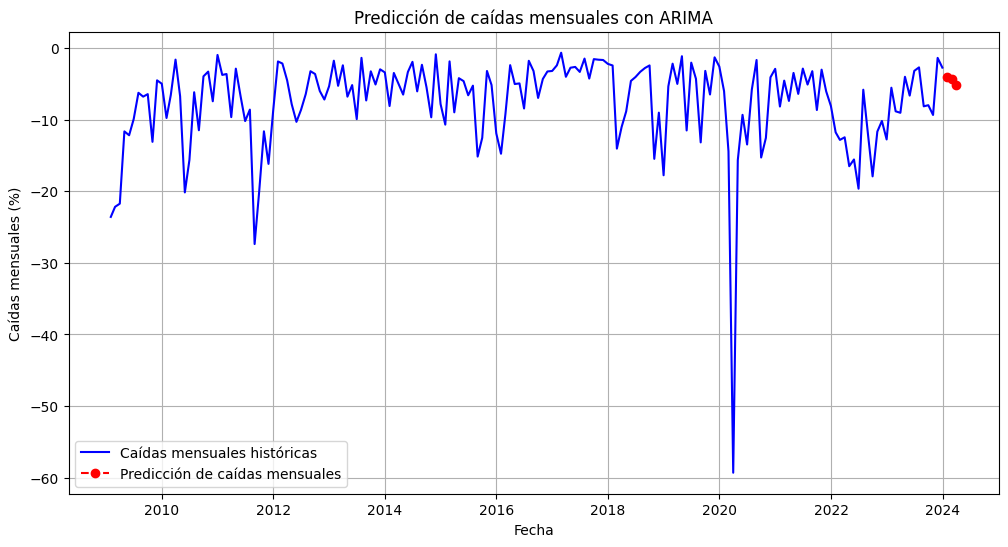

In [32]:


# Crear un modelo ARIMA con las caídas mensuales
model = ARIMA(monthly_drops, order=(5, 1, 0))  # Ajusta el orden (p, d, q) según el análisis ACF/PACF
model_fit = model.fit()

# Predicción para los próximos 3 meses
forecast = model_fit.forecast(steps=3)

# Crear un rango de fechas para las predicciones (añadiendo 3 meses a la última fecha de monthly_drops)
forecast_dates = pd.date_range(start=monthly_drops.index[-1] + pd.DateOffset(1), periods=3, freq='M')

# Crear un DataFrame con las predicciones
forecast_series = pd.Series(forecast, index=forecast_dates)

# Graficar la serie histórica y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(monthly_drops, label='Caídas mensuales históricas', color='blue')
plt.plot(forecast_series, label='Predicción de caídas mensuales', color='red', linestyle='--', marker='o')

# Añadir etiquetas y leyendas
plt.xlabel('Fecha')
plt.ylabel('Caídas mensuales (%)')
plt.title('Predicción de caídas mensuales con ARIMA')
plt.grid()
plt.legend()

# Mostrar la gráfica
plt.show()


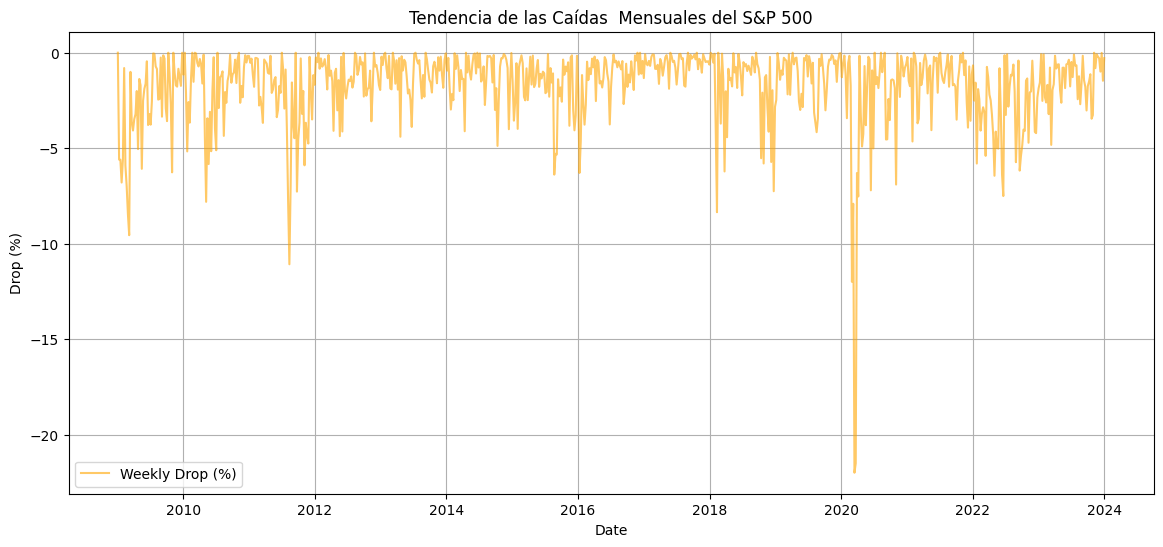

In [31]:
# Gráfico de la tendencia de caídas semanales y mensuales
plt.figure(figsize=(14, 6))
plt.plot(weekly_drops.index, weekly_drops, label='Weekly Drop (%)', color='orange', alpha=0.6)
#plt.plot(monthly_drops.index, monthly_drops, label='Monthly Drop (%)', color='green', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Drop (%)')
plt.title('Tendencia de las Caídas  Mensuales del S&P 500')
plt.legend()
plt.grid()
plt.show()
